In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Import data

In [3]:
df = pd.read_csv("data/data.csv")
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A57,A58,A59,A60,A61,A62,A63,A64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0,1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0,1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0,1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0,1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0,1


### Explore data

#### overview data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      43397 non-null  float64
 1   A2      43397 non-null  float64
 2   A3      43397 non-null  float64
 3   A4      43271 non-null  float64
 4   A5      43316 non-null  float64
 5   A6      43397 non-null  float64
 6   A7      43397 non-null  float64
 7   A8      43311 non-null  float64
 8   A9      43396 non-null  float64
 9   A10     43397 non-null  float64
 10  A11     43361 non-null  float64
 11  A12     43271 non-null  float64
 12  A13     43278 non-null  float64
 13  A14     43397 non-null  float64
 14  A15     43369 non-null  float64
 15  A16     43310 non-null  float64
 16  A17     43311 non-null  float64
 17  A18     43397 non-null  float64
 18  A19     43277 non-null  float64
 19  A20     43278 non-null  float64
 20  A21     37551 non-null  float64
 21  A22     43397 non-null  float64
 22

In [5]:
# Missing value percentage of all columns
df.isna().sum()

A1         8
A2         8
A3         8
A4       134
A5        89
        ... 
A62      127
A63      134
A64      812
class      0
year       0
Length: 66, dtype: int64

### Data Analysis

In [6]:
df["class"].value_counts(normalize=True)

class
0    0.951826
1    0.048174
Name: proportion, dtype: float64

In [7]:
# Calculate bankruptcy rate for each year
bankruptcy_rate_per_year = df.groupby('year')['class'].mean()
bankruptcy_rate_per_year

year
1    0.038566
2    0.039320
3    0.047129
4    0.052594
5    0.069374
Name: class, dtype: float64

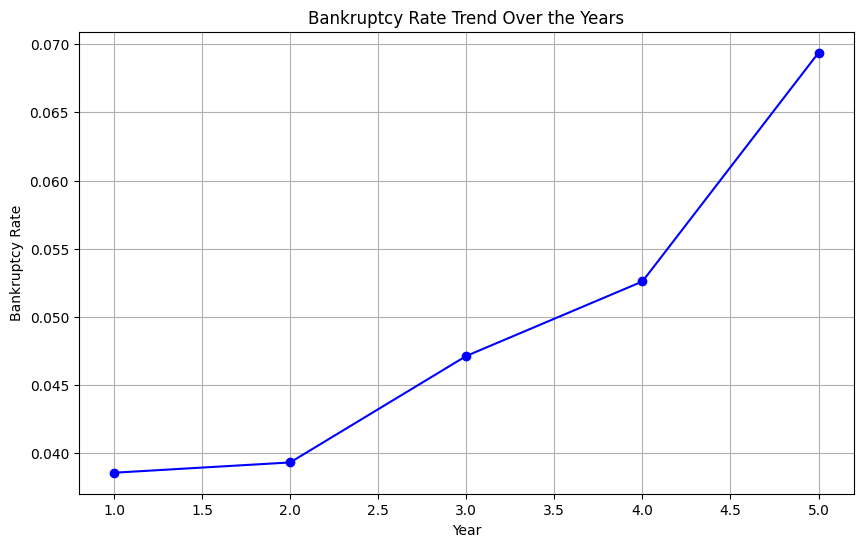

In [8]:
# Plotting the bankruptcy rate trend
plt.figure(figsize=(10, 6))
plt.plot(bankruptcy_rate_per_year.index, bankruptcy_rate_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Bankruptcy Rate Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Bankruptcy Rate')
plt.grid(True)
plt.show()

### Split

In [9]:
target = "class"
X = df.drop(columns=[target, "year"])
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43405, 64)
y shape: (43405,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34724, 64)
y_train shape: (34724,)
X_test shape: (8681, 64)
y_test shape: (8681,)


#### Resample

In [11]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)

X_train_over shape: (66148, 64)


### Build Model

#### Baseline

In [12]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9525


In [13]:
clf = make_pipeline(
    SimpleImputer(), RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [14]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99818594 0.99780801 0.99697657 0.99848817 0.99712752]


In [15]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [16]:
model = GridSearchCV(
    clf, param_grid=params, cv=5, n_jobs=-1, verbose=1
)

In [17]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [18]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.578695,0.198087,0.107597,0.043570,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.949887,0.947090,0.952986,0.949278,0.948144,0.949477,0.002000,21
1,7.413123,0.087753,0.096870,0.037325,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.941950,0.940665,0.945805,0.942550,0.939376,0.942069,0.002165,24
2,13.135887,0.398363,0.111916,0.015323,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.952457,0.950038,0.953137,0.950110,0.948825,0.950913,0.001619,20
3,13.990998,0.266307,0.121189,0.023074,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.947317,0.945503,0.949433,0.944289,0.944667,0.946242,0.001907,23
4,19.907118,0.263000,0.143064,0.001439,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.953893,0.950718,0.955631,0.951924,0.949656,0.952364,0.002156,19
5,20.319140,0.555962,0.175279,0.044200,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.948602,0.948224,0.948980,0.944969,0.943911,0.946937,0.002080,22
6,8.416082,0.067998,0.083895,0.012023,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995163,0.995389,0.994633,0.994935,0.993575,0.994739,0.000634,15
7,9.177775,0.276282,0.078962,0.001336,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994709,0.994029,0.993878,0.994557,0.992441,0.993923,0.000804,18
8,17.248958,0.422591,0.176273,0.055437,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995087,0.995465,0.995238,0.995465,0.993650,0.994981,0.000681,14
9,18.680396,0.221936,0.150205,0.004240,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995163,0.994936,0.994331,0.995087,0.993046,0.994512,0.000789,17


In [19]:
# Extract best hyperparameters
model.best_params_

{'randomforestclassifier__max_depth': 40,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

### Evaluate 

In [20]:
acc_train = model.score(X_train_over, y_train_over)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9653


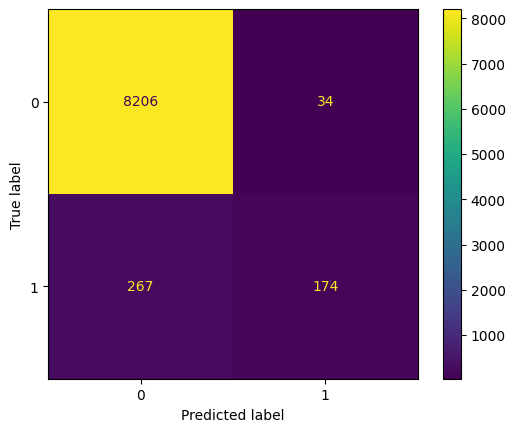

In [21]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [22]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8240
           1       0.84      0.39      0.54       441

    accuracy                           0.97      8681
   macro avg       0.90      0.70      0.76      8681
weighted avg       0.96      0.97      0.96      8681



### Communicate

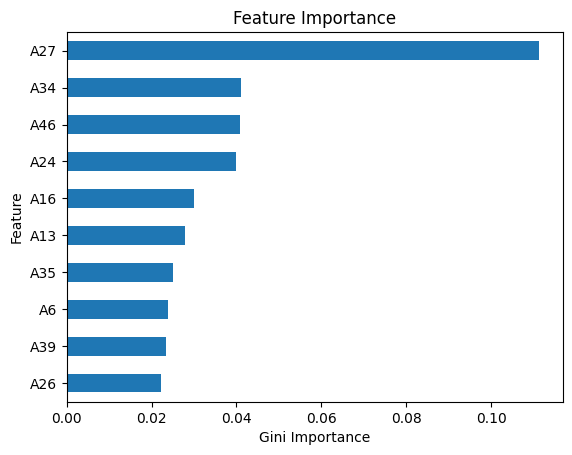

In [23]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [24]:
# Save model
with open("randomforest_model.pkl", "wb") as f:
    pickle.dump(model, f)